In [1]:

# http://janmatuschek.de/LatitudeLongitudeBoundingCoordinates
# dist = arccos(sin(lat1) · sin(lat2) + cos(lat1) · cos(lat2) · cos(lon1 - lon2)) · R
import math
xlimit_high_long= -8.62000
xlimit_low_long= -8.64000
ylimit_high_lat= 41.16
ylimit_low_lat= 41.1450
# Radius of the world
# R=
area=math.acos(math.sin(ylimit_high_lat)*math.sin(ylimit_low_lat)+
               math.cos(ylimit_high_lat)*math.cos(ylimit_low_lat)*math.cos(xlimit_high_long-xlimit_low_long))*6371

print(area)


154.40277137013325


In [2]:
lon_high= -8.62000
lon_low= -8.64000
lat_high= 41.16
lat_low= 41.1450
# we will divide this area into 11(lat)*14(lon) grid
lon_difference=abs(lon_high-lon_low)
lon_fraction=lon_difference/14
lat_difference=abs(lat_high-lat_low)
lat_fraction=lat_difference/11
print(lon_fraction)
print(lat_fraction)

0.001428571428571525
0.0013636363636357694


In [3]:
lon_axis=[]
lon_axis.append(lon_low)
for i in range(13):
    temp=lon_axis[i]+lon_fraction
    lon_axis.append(temp)
lon_axis.append(lon_high)
print(lon_axis)
    

[-8.64, -8.63857142857143, -8.637142857142859, -8.635714285714288, -8.634285714285717, -8.632857142857146, -8.631428571428575, -8.630000000000004, -8.628571428571433, -8.627142857142863, -8.625714285714292, -8.62428571428572, -8.62285714285715, -8.621428571428579, -8.62]


In [4]:
lat_axis=[]
lat_axis.append(lat_low)
for i in range(10):
    temp=lat_axis[i]+lat_fraction
    lat_axis.append(temp)
lat_axis.append(lat_high)
print(lat_axis)

[41.145, 41.14636363636364, 41.14772727272727, 41.14909090909091, 41.150454545454544, 41.15181818181818, 41.153181818181814, 41.15454545454545, 41.155909090909084, 41.15727272727272, 41.158636363636354, 41.16]


In [5]:
lon_axis[5]

-8.632857142857146

In [6]:
Rawtrajectories=0
syntheticTrajectories=0

In [7]:
import pandas as pd
import numpy as np
heat_array = np.zeros((11, 14),dtype=int)
print(heat_array)
for i in range(336):
    i=i+1
    filename="raw_data/rawData_"+str(i)+".csv"
#     print(filename)
    rawData = pd.read_csv(filename)
#     print(rawData)
    
    for data in range(len(rawData)):
        Rawtrajectories=Rawtrajectories+1
#     for data in range(1):
        lat=rawData.lat[data]
        lon=rawData.lon[data]
#         print(lat)
#         print(lon)
        lon_column=None
        lat_row=None
        for ln in range(len(lon_axis)-1):
            ln_1=ln+1
            if lon>=lon_axis[ln] and lon<lon_axis[ln_1]:
#                 print(lon_axis[ln])
#                 print(lon_axis[ln_1])
                lon_column=ln
                break
#         print(lon_column)
        for lt in range(len(lat_axis)-1):
            lt_1=lt+1
            if lat>=lat_axis[lt] and lat<lat_axis[lt_1]:
#                 print(lat_axis[lt])
#                 print(lat_axis[lt_1])
                lat_row=lt
                break
#         print(lat_row)
        heat_array[lat_row,lon_column]=heat_array[lat_row,lon_column]+1
print(heat_array)
        

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[  0   0   0   0   0   4  29   6   9  11  60  23  36  33]
 [  0   0   0   0   0  66  55  43   0   0   8   8 222 127]
 [  0   0   0   0   0  15  11  25   8  52 236 107 135   0]
 [  0   0   0   0   0   4  35  39  62  95 117 129  46 114]
 [  0   0   0   0   0   0   9 206  32 167   2 131 229  73]
 [  0   0   0   0   0  46 281 206 277 523  43  32  19 202]
 [  0   0   0   0   0  24 261  73  38 173  22   0   0  88]
 [  0   0   0   0   0   0 431  60 105 125 119  97  41 206]
 [  0   0   0   0   0   5  27 192 284  38 165 112 157  85]
 [  0   0   0   0   0   8 157  20 520 130  87  43  59  11]
 [  0   0   0   0   0   5  15 100  74  86  58  15   2   3]]


In [8]:
print(Rawtrajectories)

8769


In [9]:
# Rawtrajectories=50000000
heat_array_traj = np.zeros((11, 14),dtype=int)
print(heat_array_traj)
for i in range(133):
#     i=i+1
    filename="syntheticTrajectories/syntheticTrajectories"+str(i)+".csv"
#     print(filename)
    rawData = pd.read_csv(filename)
#     print(rawData)
    for data in range(len(rawData)):
        if(syntheticTrajectories==Rawtrajectories):
            break
        else:
            syntheticTrajectories=syntheticTrajectories+1
    #     for data in range(1):
            lat=rawData.lat[data]
            lon=rawData.lon[data]
    #         print(lat)
    #         print(lon)
            lon_column=None
            lat_row=None
            for ln in range(len(lon_axis)-1):
                ln_1=ln+1
                if lon>=lon_axis[ln] and lon<lon_axis[ln_1]:
    #                 print(lon_axis[ln])
    #                 print(lon_axis[ln_1])
                    lon_column=ln
                    break
    #         print(lon_column)
            for lt in range(len(lat_axis)-1):
                lt_1=lt+1
                if lat>=lat_axis[lt] and lat<lat_axis[lt_1]:
    #                 print(lat_axis[lt])
    #                 print(lat_axis[lt_1])
                    lat_row=lt
                    break
    #         print(lat_row)
            heat_array_traj[lat_row,lon_column]=heat_array_traj[lat_row,lon_column]+1
print(heat_array_traj)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  305  237  174    0]
 [   0    0    0    0    0    0    0    0    2  545  668  447  144   55]
 [   0    0    0    0    0    0    4  157  208  782    6   28    0    1]
 [   0    0    0    0    0    6   19  118  366 1165    2    8    8    2]
 [   0    0    0    0    0   84   14   49   90   33    6    2    0    0]
 [   0    0    0    0    0    0  127  170  462   56   11    0    0    0]
 [   0    0    0    0    0    0  146 1180   57    0    3    0    0    0]
 

In [10]:
print(syntheticTrajectories)

8769


In [11]:
from scipy.spatial import distance

In [12]:
Aflat = np.hstack(heat_array)
Bflat = np.hstack(heat_array_traj)

dist = distance.cosine(Aflat, Bflat)
print(dist)

0.43061662784404


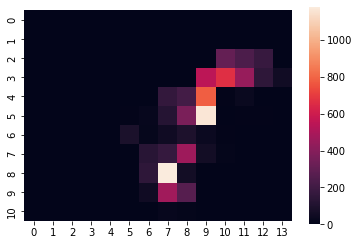

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# np.random.seed(0)
# A = np.random.uniform(0,500,(4,3))
sns.heatmap(heat_array_traj, square=True)
# plt.xlim(lon_low, lon_high)
# plt.ylim(lat_low, lat_high)
plt.show()

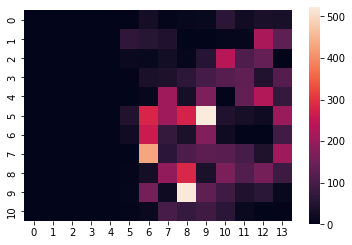

In [14]:
sns.heatmap(heat_array, square=True)
plt.show()